## Upload the Dataset into the Data Folder and Read the dataset using Pandas

In [1]:
# Read the Dataset
import pandas as pd
df = pd.read_csv('./data/raw/drug200.csv')

## Exploratory Data Analysis (EDA)

In [2]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [3]:
# Shape of the Dataset
df.shape

(200, 6)

In [4]:
# Display the first 5 Rows
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
# Display the Last 5 Rows
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
# Check the Null values in the dataset
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
# Desccribe the Dataset for Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [9]:
# Desccribe the Dataset for Categorical Columns
df.describe(include='object').T

,count,unique,top,freq
Sex,200,2,M,104
BP,200,3,HIGH,77
Cholesterol,200,2,HIGH,103
Drug,200,5,DrugY,91


## Divide the Categorical and Numerical Columns

In [10]:
# Divide the Categorical and Numerical Columns
cat_cols = df.select_dtypes(include='object').columns
print(f"Categorical columns are: {cat_cols}")

num_cols = df.select_dtypes(exclude='object').columns
print(f"Numerical columns are: {num_cols}")

Categorical columns are: Index(['Sex', 'BP', 'Cholesterol', 'Drug'], dtype='object')
Numerical columns are: Index(['Age', 'Na_to_K'], dtype='object')


## LableEncoder the Categorical Columns

In [11]:
# Label Encoding the Categorical Columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])

# Display the values
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


## Data Normalization

In [12]:
# Normalize the Dataset using MinMaxscaler.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.135593,0,0,0,0.596848,0
1,0.542373,1,1,0,0.213397,3
2,0.542373,1,1,0,0.120239,3
3,0.220339,0,2,0,0.047814,4
4,0.779661,0,1,0,0.368191,0


## Split the Dataset into Training and Testing

In [13]:
# Split the Data into Training and Testing
from sklearn.model_selection import train_test_split
X = df.drop('Drug', axis=1)
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [16]:
# Train the Model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score

model = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

for name, clf in model.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy for {name} model: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report for {name} model:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix for {name} model:\n{confusion_matrix(y_test, y_pred)}")
    print(f"F1 Score for {name} model: {f1_score(y_test, y_pred, average='weighted')}")
    print(f"Precision Score for {name} model: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall Score for {name} model: {recall_score(y_test, y_pred, average='weighted')}")
    print("\n")

Accuracy for Random Forest model: 1.0
Classification Report for Random Forest model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix for Random Forest model:
[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
F1 Score for Random Forest model: 1.0
Precision Score for Random Forest model: 1.0
Recall Score for Random Forest model: 1.0


Accuracy for Gradient Boosting model: 1.0
Classification Report for Gradient Boosting model:
              precision    recall  f1-score   support

           0      

D:\My Personal\MLOPS\drug_classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\My Personal\MLOPS\drug_classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\My Personal\MLOPS\drug_classification\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

## Select the Model

In [18]:
# Select the Model : RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Store the Metrics

In [19]:
# Write the Metrics
with open('./reports/metrics.txt', 'w') as f:
    f.write(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
    f.write(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
    f.write(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    f.write(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}\n")
    f.write(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}\n")
    f.write(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}\n")
    f.write(f"Model Used: {model}\n")

## Confusion Matrix Display using Plot

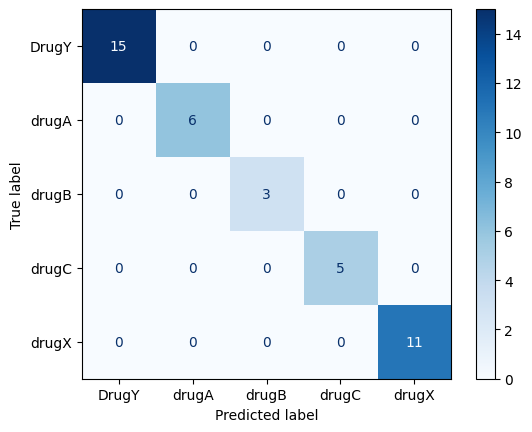

<Figure size 640x480 with 0 Axes>

In [20]:
# Confusion Matrix Display using Plot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Save this plot image
plt.savefig('./reports/confusion_matrix.png')

## Save the Model using SKOPS

In [22]:
# Save the MOdel using SKOPS
import skops.io as sio
sio.dump(model, './models/drug-classification.skops')

## Load the Model

In [23]:
# Load the Model
sio.load('./models/drug-classification.skops')

RandomForestClassifier()